#### Importing Libraries

In [71]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

import joblib

In [39]:
data = pd.read_csv('./data/customer_churn_data.csv')

In [40]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [42]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [43]:
target = data["Churn"].value_counts().to_frame()
target = target.reset_index()
target = target.rename(columns={'index': 'Category'})

In [44]:
target

,Category,Churn
0,No,5174
1,Yes,1869


#### Comparing the number of Yes and No in the Churn column in the dataset. As we can see, the dataset is not balances. There are more negative examples than the positive examples.

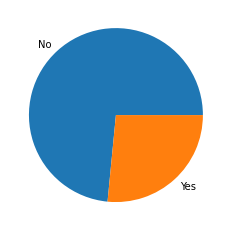

In [45]:
plt.pie(target['Churn'],labels = target['Category'])
plt.show()

In [46]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [49]:
data.loc[data.SeniorCitizen==0,'SeniorCitizen'] = "No" 
data.loc[data.SeniorCitizen==1,'SeniorCitizen'] = "Yes"

In [50]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
data.drop(["customerID"],axis=1,inplace = True)

def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

data['Churn'] = data[['Churn']].apply(binary_map)

data['gender'] = data['gender'].map({'Male':1, 'Female':0})

binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
data[binary_list] = data[binary_list].apply(binary_map)

data = pd.get_dummies(data, drop_first=True)

In [52]:
data.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6473,0,0,0,0,1,1,0,94.40,94.40,1,...,0,0,1,0,1,0,0,0,1,0
291,1,0,0,0,35,1,0,61.20,2021.20,0,...,0,0,0,0,0,1,0,0,0,1
1227,1,0,0,0,30,1,0,90.40,2820.65,0,...,0,0,0,0,0,1,0,0,0,0
4084,0,0,0,0,1,1,0,78.05,78.05,1,...,0,0,1,0,0,0,0,0,1,0
3732,0,0,1,1,23,1,1,77.15,1759.40,0,...,1,0,1,0,0,0,1,0,0,0
2660,1,0,0,1,13,1,1,52.10,670.65,0,...,0,0,0,0,0,0,0,1,0,0
2780,0,0,0,0,25,1,0,74.30,1863.80,1,...,1,0,1,0,0,1,0,0,0,1
2565,0,0,1,1,13,1,1,25.00,332.50,0,...,0,1,0,1,0,0,1,0,0,0
4540,1,0,0,0,1,1,0,20.95,20.95,0,...,0,1,0,1,0,0,0,0,0,0
1962,1,0,0,0,23,1,1,99.95,2292.75,0,...,0,0,1,0,1,1,0,1,0,0


#### Normalizing the datatset

In [53]:
sc = MinMaxScaler()
data['tenure'] = sc.fit_transform(data[['tenure']])
data['MonthlyCharges'] = sc.fit_transform(data[['MonthlyCharges']])
data['TotalCharges'] = sc.fit_transform(data[['TotalCharges']])

#### Creating the training and test dataset

In [54]:
x = data.drop('Churn',axis = 1)
y = data['Churn']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

#### Creating functions to train different models on the train dataset and score those models on the test dataset.

In [55]:
def model(algo,name,params = {}):
    model = algo(**params)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    def score_model(algo,y_true,y_pred):
        print(name)
        
        acc = accuracy_score(y_true,y_pred)
        print("Accuracy -> ",acc)
        
        pre_score = precision_score(y_true,y_pred)
        print("Precision Score -> ",pre_score)
        
        rec_score = recall_score(y_true,y_pred)
        print("Recall Score -> ",rec_score)
        
        f1 = f1_score(y_true,y_pred)
        print("F1 Score -> ",f1)
    
    score_model(algo,y_test,y_pred)
    return model

In [56]:
logistic_model = model(LogisticRegression,'Logistic Regression Model')

Logistic Regression Model
Accuracy ->  0.8017037387600567
Precision Score ->  0.6846652267818575
Recall Score ->  0.5372881355932203
F1 Score ->  0.6020892687559354


In [58]:
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(x, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

C:\Users\vatsa\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


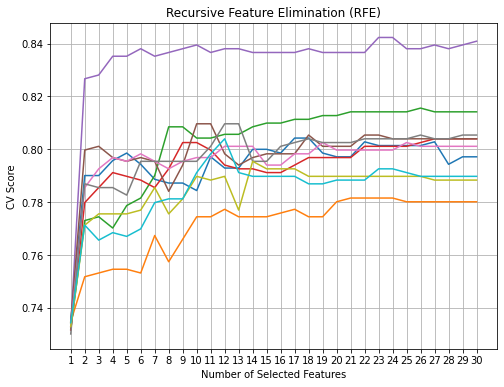

The optimal number of features: 23


In [60]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, x.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [61]:
x_feat = x.iloc[:, rfecv.support_]

In [63]:
x_feat.shape

(7043, 23)

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x_feat,y,test_size = 0.3)

In [66]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4930, 23), (4930,), (2113, 23), (2113,))

In [67]:
logistic_model = model(LogisticRegression,name = "Logistic Regression Selected Features")

Logistic Regression Selected Features
Accuracy ->  0.8111689540937056
Precision Score ->  0.6560509554140127
Recall Score ->  0.5659340659340659
F1 Score ->  0.6076696165191741


In [68]:
svc_model = model(SVC,"SVC Classifier")

SVC Classifier
Accuracy ->  0.8097491717936584
Precision Score ->  0.6636363636363637
Recall Score ->  0.5347985347985348
F1 Score ->  0.5922920892494928


In [69]:
random_forest_model = model(RandomForestClassifier,
                           name = "Random Forest Classifier")

Random Forest Classifier
Accuracy ->  0.79649787032655
Precision Score ->  0.6288888888888889
Recall Score ->  0.5183150183150184
F1 Score ->  0.568273092369478


In [70]:
decision_tree_model = model(DecisionTreeClassifier,
                           name = 'Decision Tree Classifier')

Decision Tree Classifier
Accuracy ->  0.7501183151916706
Precision Score ->  0.516245487364621
Recall Score ->  0.5238095238095238
F1 Score ->  0.5199999999999999


In [74]:
joblib.dump(svc_model,"final_model.sav")

['final_model.sav']